## Importing all Usefull Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt

In [2]:
df=pd.read_csv("C:/Users/volam santhosh kumar/Desktop/transaction_data.csv")

In [3]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [4]:
df.dtypes

UserId                      int64
TransactionId               int64
TransactionTime            object
ItemCode                    int64
ItemDescription            object
NumberOfItemsPurchased      int64
CostPerItem               float64
Country                    object
dtype: object

In [5]:
df.shape

(1083818, 8)

## Dealing with Missing Values

In [6]:
# Making a list of features which has missing values
features_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]

#Printing Features name and missing value percentage
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean(),20),"% Missing Values")

ItemDescription 0.002683107311375157 % Missing Values


In [7]:
df.isnull().sum()

UserId                       0
TransactionId                0
TransactionTime              0
ItemCode                     0
ItemDescription           2908
NumberOfItemsPurchased       0
CostPerItem                  0
Country                      0
dtype: int64

In [8]:
df["ItemDescription"].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     4738
REGENCY CAKESTAND 3 TIER               4400
JUMBO BAG RED RETROSPOT                4318
PARTY BUNTING                          3454
LUNCH BAG RED RETROSPOT                3276
                                       ... 
ASSORTED COLOUR SILK GLASSES CASE         2
ETCHED GLASS STAR TREE DECORATION         2
PINK LARGE JEWELED PHOTOFRAME             2
OOH LA LA DOGS COLLAR                     2
alan hodge cant mamage this section       2
Name: ItemDescription, Length: 4223, dtype: int64

In [9]:
df["ItemDescription"].fillna(df["ItemDescription"].value_counts().index[0],inplace=True)

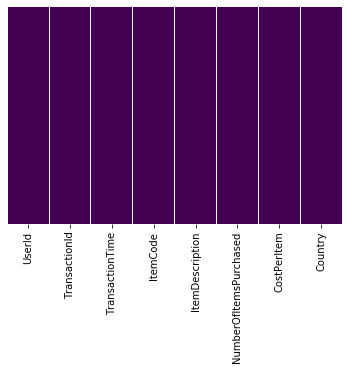

In [10]:
# Heatmap shows Zero Null values.
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [11]:
len(df["Country"].unique())

38

## Filtering Data with Less Customers in each Country

In [12]:
# Customer Distribution by country.
country_cust = df[["Country","UserId"]].drop_duplicates()
country_cust.groupby(["Country"])["UserId"].aggregate("count").reset_index().sort_values("UserId",ascending=False)

,Country,UserId
36,United Kingdom,3951
14,Germany,95
13,France,88
31,Spain,31
3,Belgium,25
33,Switzerland,22
27,Portugal,20
19,Italy,15
12,Finland,12
1,Austria,11


In [13]:
# we can see that most of the Users are from United Kingdom.
# so filter for only United Kingdom using query method.
df = df.query("Country=='United Kingdom'").reset_index(drop=True)

## Filtering Negative Values

In [14]:
# Checking Negative values in costs.
df.CostPerItem.min()

-15265.64

In [15]:
# Checking Negative values in Quantity.
df.NumberOfItemsPurchased.min()

-242985

In [16]:
df.shape

(990956, 8)

In [17]:
# Filtering Records With negative values.
df = df[(df["CostPerItem"]>0)]
df = df[(df["NumberOfItemsPurchased"]>0)]
df = df[(df["UserId"]>0)]

In [18]:
df.shape

(708642, 8)

In [19]:
# Adding New column representing Total Amount
df["TotalAmount"] = df["NumberOfItemsPurchased"]*df["CostPerItem"]

In [20]:
df.shape

(708642, 9)

In [21]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,TotalAmount
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,70.38
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,10.56
2,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,5.19
4,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,42.24
5,345954,6162981,Fri Sep 28 10:51:00 IST 2018,471576,NATURAL SLATE CHALKBOARD LARGE,9,6.84,United Kingdom,61.56


In [22]:
df.iloc[0,2]

'Sat Feb 02 12:50:00 IST 2019'

In [23]:
# Converting string time to datetime.datetime
trans_time=[]
for i in range(708642):
    trans_time.append(dt.strptime(df.iloc[i,2],"%a %b %d %H:%M:%S IST %Y"))

In [24]:
trans_time

[datetime.datetime(2019, 2, 2, 12, 50),
 datetime.datetime(2018, 12, 26, 9, 6),
 datetime.datetime(2018, 6, 22, 7, 14),
 datetime.datetime(2019, 1, 11, 9, 50),
 datetime.datetime(2018, 9, 28, 10, 51),
 datetime.datetime(2018, 12, 10, 9, 23),
 datetime.datetime(2019, 2, 16, 10, 35),
 datetime.datetime(2018, 12, 15, 10, 5),
 datetime.datetime(2018, 10, 29, 9, 4),
 datetime.datetime(2019, 2, 3, 9, 25),
 datetime.datetime(2018, 12, 10, 5, 43),
 datetime.datetime(2019, 1, 21, 9, 54),
 datetime.datetime(2018, 7, 21, 8, 14),
 datetime.datetime(2018, 7, 9, 9, 3),
 datetime.datetime(2018, 11, 18, 11, 14),
 datetime.datetime(2018, 6, 11, 11, 5),
 datetime.datetime(2018, 12, 11, 7, 39),
 datetime.datetime(2019, 1, 12, 10, 9),
 datetime.datetime(2018, 8, 6, 8, 34),
 datetime.datetime(2019, 1, 28, 9, 13),
 datetime.datetime(2019, 2, 9, 7, 54),
 datetime.datetime(2018, 10, 1, 7, 54),
 datetime.datetime(2018, 12, 3, 11, 54),
 datetime.datetime(2018, 4, 13, 10, 36),
 datetime.datetime(2018, 4, 29, 7, 

In [25]:
type(trans_time[0])

datetime.datetime

In [26]:
# replacing str to datetime.datetime
df["TransactionTime"]=trans_time

In [27]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,TotalAmount
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,70.38
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,10.56
2,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,5.19
4,285957,6307136,2019-01-11 09:50:00,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,42.24
5,345954,6162981,2018-09-28 10:51:00,471576,NATURAL SLATE CHALKBOARD LARGE,9,6.84,United Kingdom,61.56


## RFM Model(Recency,Frequency,Monetory)

In [28]:
# Setting latest date so that we can get the number of days from recent purchases.
Latest_Date = dt(2019,2,28)

In [29]:
# Creating RFM modelling scores for each customer
RFMScores=df.groupby("UserId").agg({"TransactionTime": lambda x: (Latest_Date - x.max()).days,"TransactionId": lambda x: len(x),"TotalAmount": lambda x: x.sum()})

In [30]:
# Converting Transaction time to type int
RFMScores["TransactionTime"] = RFMScores["TransactionTime"].astype(int)

In [31]:
# Renaming Column names tpo Recency, Frequency and Monetary
RFMScores.rename(columns={"TransactionTime": "Recency","TransactionId":"Frequency","TotalAmount":"Monetary"},inplace=True)

In [32]:
RFMScores.reset_index().head()

,UserId,Recency,Frequency,Monetary
0,259266,332,2,641217.60
1,267687,9,206,34785.78
2,267708,-3278,9190,279834.54
3,267729,10,398,33914.88
4,269220,10,118,7821.24


In [33]:
# Eliminate cells with Recency<0,As per the dataset latest date is feb 2019.
RFMScores.Recency.min()

-3278

In [34]:
RFMScores.shape

(3920, 3)

In [35]:
RFMScores = RFMScores[(RFMScores["Recency"]>0)]

In [36]:
RFMScores.shape

(3859, 3)

In [37]:
RFMScores.Recency.describe()

count    3859.000000
mean       99.016585
std        99.179740
min         7.000000
25%        24.000000
50%        58.000000
75%       150.000000
max       380.000000
Name: Recency, dtype: float64

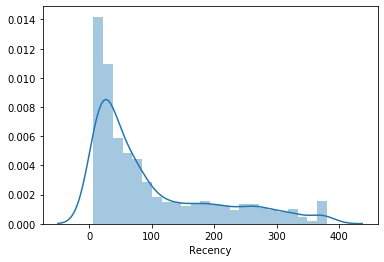

In [38]:
#Recency distribution plot
x = RFMScores['Recency']
ax = sns.distplot(x)

In [39]:
RFMScores.Frequency.describe()

count     3859.000000
mean       175.612335
std        410.835418
min          2.000000
25%         32.000000
50%         80.000000
75%        196.000000
max      15694.000000
Name: Frequency, dtype: float64

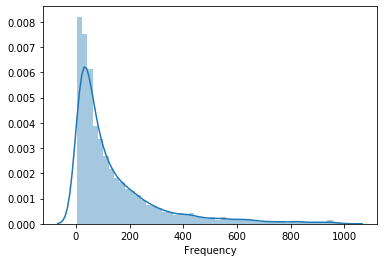

In [40]:
#Frequency distribution plot, taking observations which have frequency less than 1000 for visualization.
x = RFMScores.query('Frequency < 1000')['Frequency']
ax = sns.distplot(x)

In [41]:
RFMScores.Monetary.describe()

count    3.859000e+03
mean     3.502883e+04
std      1.311170e+06
min      3.114000e+01
25%      2.471220e+03
50%      5.318640e+03
75%      1.285026e+04
max      8.142170e+07
Name: Monetary, dtype: float64

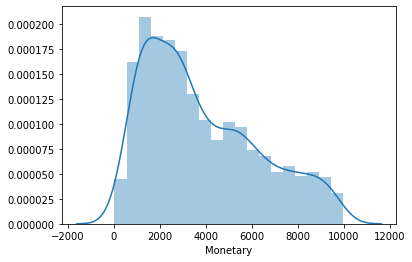

In [42]:
#Monateray distribution plot, taking observations which have monetary value less than 10000 for Visualization.
x = RFMScores.query('Monetary < 10000')['Monetary']
ax = sns.distplot(x)

In [43]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [44]:
quantiles

{'Recency': {0.25: 24.0, 0.5: 58.0, 0.75: 150.0},
 'Frequency': {0.25: 32.0, 0.5: 80.0, 0.75: 196.0},
 'Monetary': {0.25: 2471.2200000000003,
  0.5: 5318.64,
  0.75: 12850.259999999998}}

In [45]:
# Functions to create R, F and M segments.
# less recency,more Frequency and Monetary are Better for our model.
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [46]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
UserId,,,,,,
259266,332,2,641217.60,4,4,1
267687,9,206,34785.78,1,1,1
267729,10,398,33914.88,1,1,1
269220,10,118,7821.24,1,2,2
269241,221,12,769.56,4,4,4


In [47]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
#Lower the RFMScore,the more important the customer. 
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
UserId,,,,,,,,
259266,332,2,641217.60,4,4,1,441,9
267687,9,206,34785.78,1,1,1,111,3
267729,10,398,33914.88,1,1,1,111,3
269220,10,118,7821.24,1,2,2,122,5
269241,221,12,769.56,4,4,4,444,12


In [48]:
# Segmenting the Userid to 4 Clusters namely 'Platinum', 'Gold', 'Silver', 'Bronze'.
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,UserId,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,259266,332,2,641217.60,4,4,1,441,9,Silver
1,267687,9,206,34785.78,1,1,1,111,3,Platinum
2,267729,10,398,33914.88,1,1,1,111,3,Platinum
3,269220,10,118,7821.24,1,2,2,122,5,Platinum
4,269241,221,12,769.56,4,4,4,444,12,Bronze


In [49]:
# Top 10 important Customers with Descending Monetary Value.
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,UserId,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,350364,11,554,553238.58,1,1,1,111,3,Platinum
1,287574,10,1136,540493.68,1,1,1,111,3,Platinum
2,296016,11,10222,540049.98,1,1,1,111,3,Platinum
3,321531,7,4758,504664.50,1,1,1,111,3,Platinum
4,274869,9,3636,488036.64,1,1,1,111,3,Platinum
5,331149,14,260,466942.80,1,1,1,111,3,Platinum
6,300258,15,3274,428266.68,1,1,1,111,3,Platinum
7,295848,17,1178,418452.66,1,1,1,111,3,Platinum
8,374661,8,15694,340079.16,1,1,1,111,3,Platinum
9,289758,8,698,308407.98,1,1,1,111,3,Platinum


In [50]:
# OUTPUT
RFMScores.loc[:, [ 'RFM_Loyalty_Level'] ].to_csv("Output File")

## K - Means Clustering

In [51]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

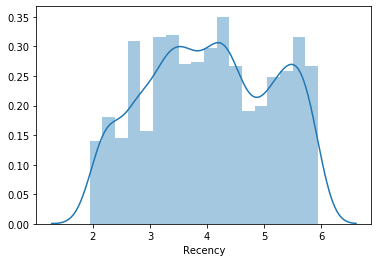

In [52]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.distplot(Recency_Plot)

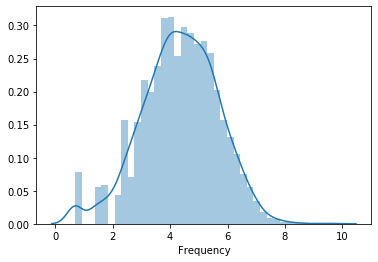

In [53]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
ax = sns.distplot(Frequency_Plot)

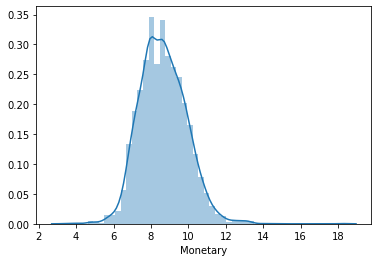

In [54]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
ax = sns.distplot(Monetary_Plot)

In [55]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)

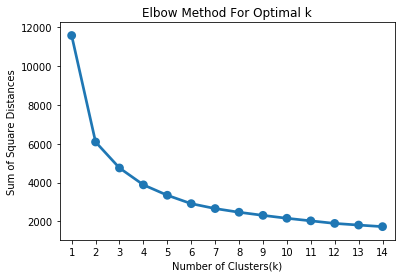

In [56]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [57]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
UserId,,,,,,,,,,
259266,332,2,641217.60,4,4,1,441,9,Silver,2
267687,9,206,34785.78,1,1,1,111,3,Platinum,1
267729,10,398,33914.88,1,1,1,111,3,Platinum,1
269220,10,118,7821.24,1,2,2,122,5,Platinum,1
269241,221,12,769.56,4,4,4,444,12,Bronze,0


<Figure size 504x504 with 0 Axes>

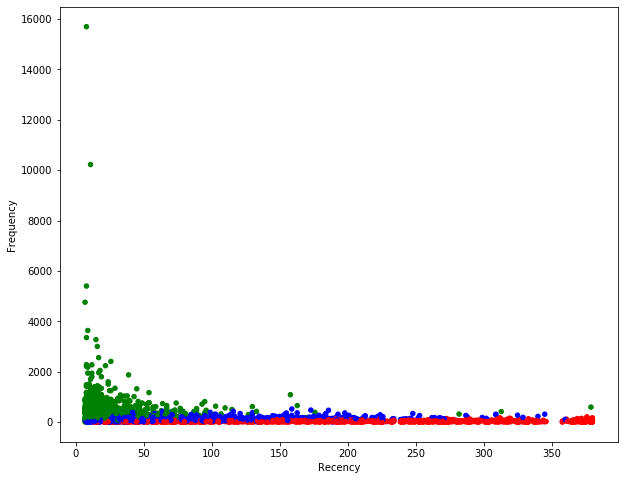

In [58]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = RFMScores['Color']
)

In [59]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
UserId,,,,,,,,,,,
259266,332,2,641217.60,4,4,1,441,9,Silver,2,blue
267687,9,206,34785.78,1,1,1,111,3,Platinum,1,green
267729,10,398,33914.88,1,1,1,111,3,Platinum,1,green
269220,10,118,7821.24,1,2,2,122,5,Platinum,1,green
269241,221,12,769.56,4,4,4,444,12,Bronze,0,red
